In [22]:
import pandas as pd
import numpy as np

# библиотека для построения графиков
import seaborn as sns
# библиотека с упрощенными графиками
import matplotlib.pyplot as plot

In [23]:
df = pd.read_csv('vgsales_1.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,13982,Trine 2,PC,2011.0,Platform,Focus Home Interactive,0.00,0.03,0.00,0.01,0.04
1,4269,Gremlins,2600,1983.0,Action,Atari,0.43,0.03,0.00,0.00,0.46
2,5519,Battle Dodge Ball,SNES,1991.0,Sports,Banpresto,0.00,0.00,0.33,0.00,0.33
3,4476,TimeSplitters 2,GC,2002.0,Shooter,Eidos Interactive,0.34,0.09,0.00,0.01,0.44
4,13052,Sherlock Holmes: Crimes & Punishments,PC,2014.0,Adventure,Focus Home Interactive,0.00,0.05,0.00,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...
548,13109,ESPN International Winter Sports 2002,GC,2002.0,Sports,Konami Digital Entertainment,0.04,0.01,0.00,0.00,0.05
549,5882,Fossil Fighters (JP sales),DS,2008.0,Role-Playing,Nintendo,0.00,0.00,0.30,0.00,0.30
550,152,Resident Evil 2,PS,1998.0,Action,Virgin Interactive,1.88,1.47,2.02,0.45,5.82
551,1702,Final Fantasy I & II: Dawn of Souls,GBA,2004.0,Role-Playing,Nintendo,0.64,0.24,0.29,0.02,1.19


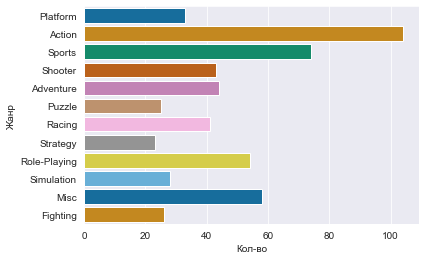

In [24]:
#- Продемонстрировать график количества значений категориального атрибута (countplot);

sns.set_style('darkgrid')
sns.countplot(y='Genre',data=df,palette='colorblind')
plot.xlabel('Кол-во')
plot.ylabel('Жанр')
plot.show()

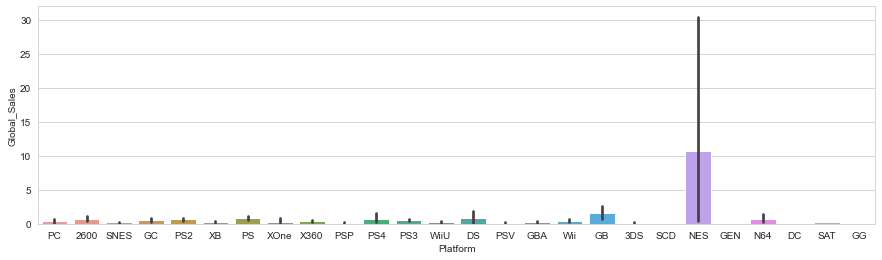

In [25]:
#- Отобразить среднее значение атрибутов (barplot);
sns.set_style('whitegrid')
graph = sns.barplot(x=df["Platform"], y=df["Global_Sales"])
graph.figure.set_figwidth(15)

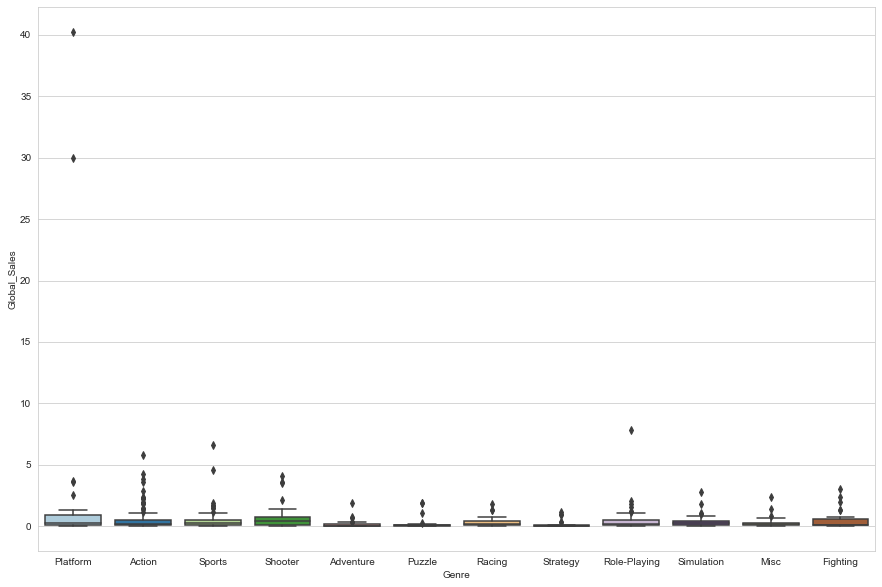

In [26]:
#- Реализовать ящик с усами (boxplot);
graph = sns.boxplot(x="Genre", y="Global_Sales",data = df,palette='Paired')
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

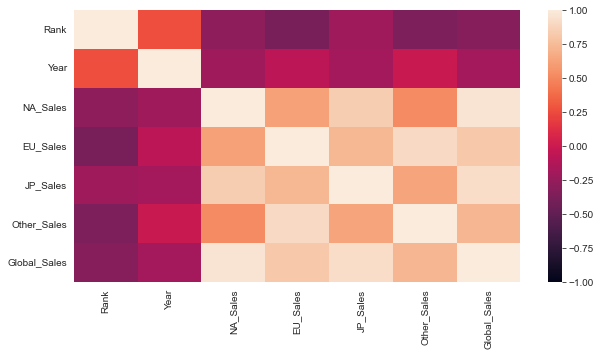

In [27]:
#- Сделать тепловую карту корреляции (heatmap);
HeatMap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1)
HeatMap.figure.set_figwidth(10)
HeatMap.figure.set_figheight(5) 

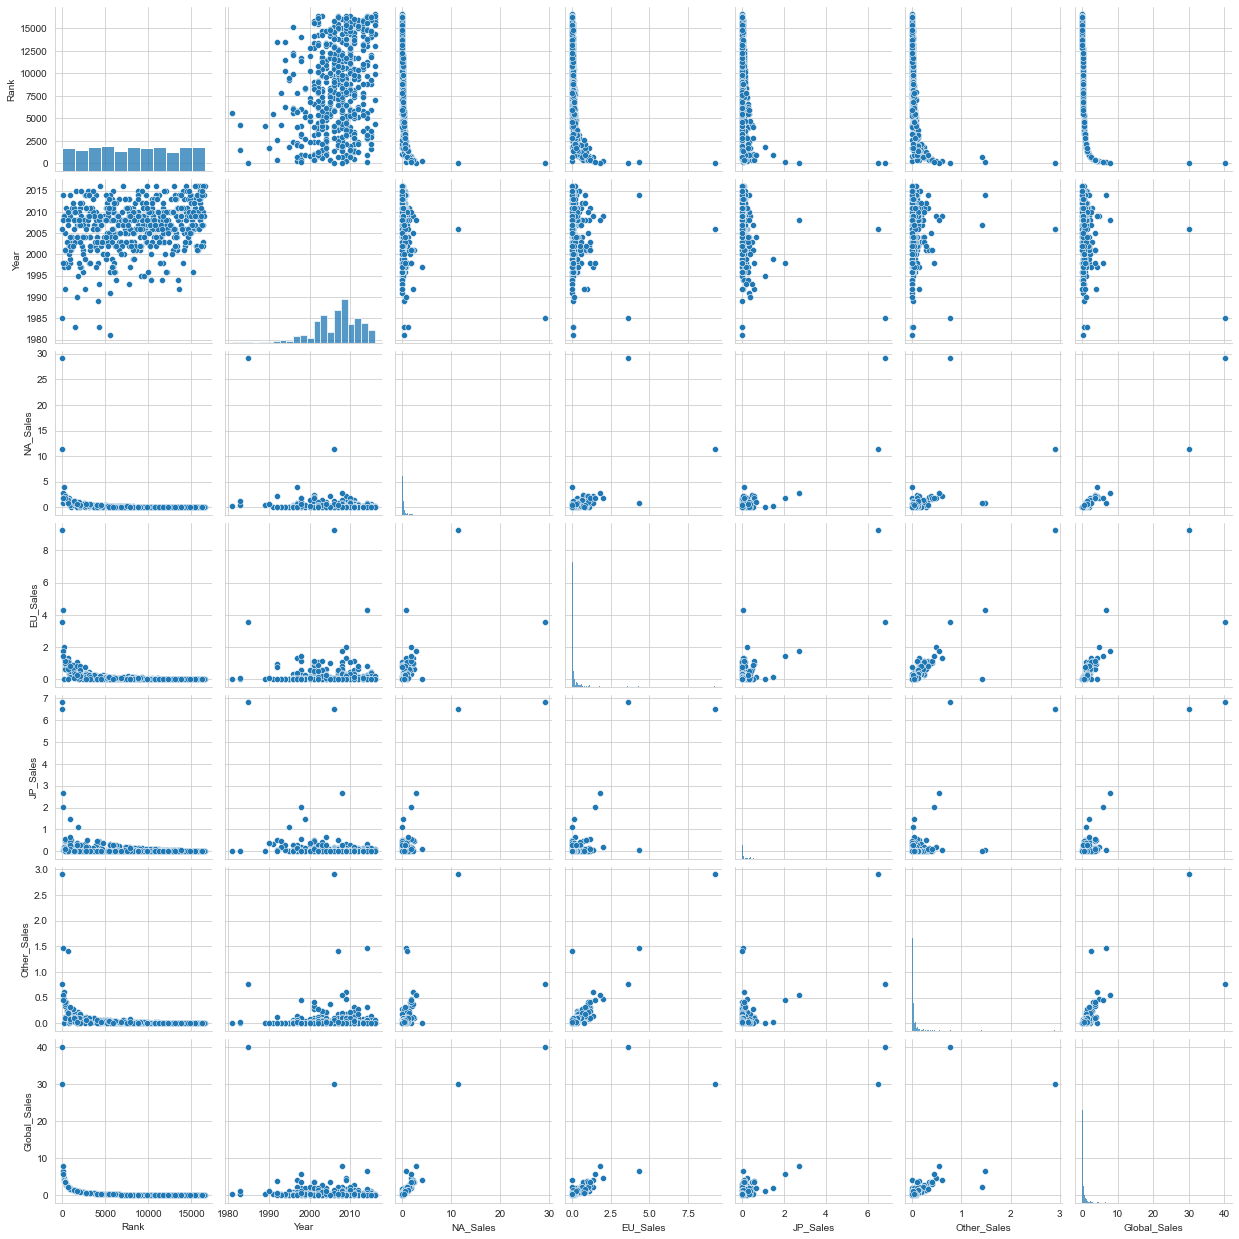

In [28]:
#- Показать соотношение между атрибутами (piarplot);
pair = sns.pairplot(df)

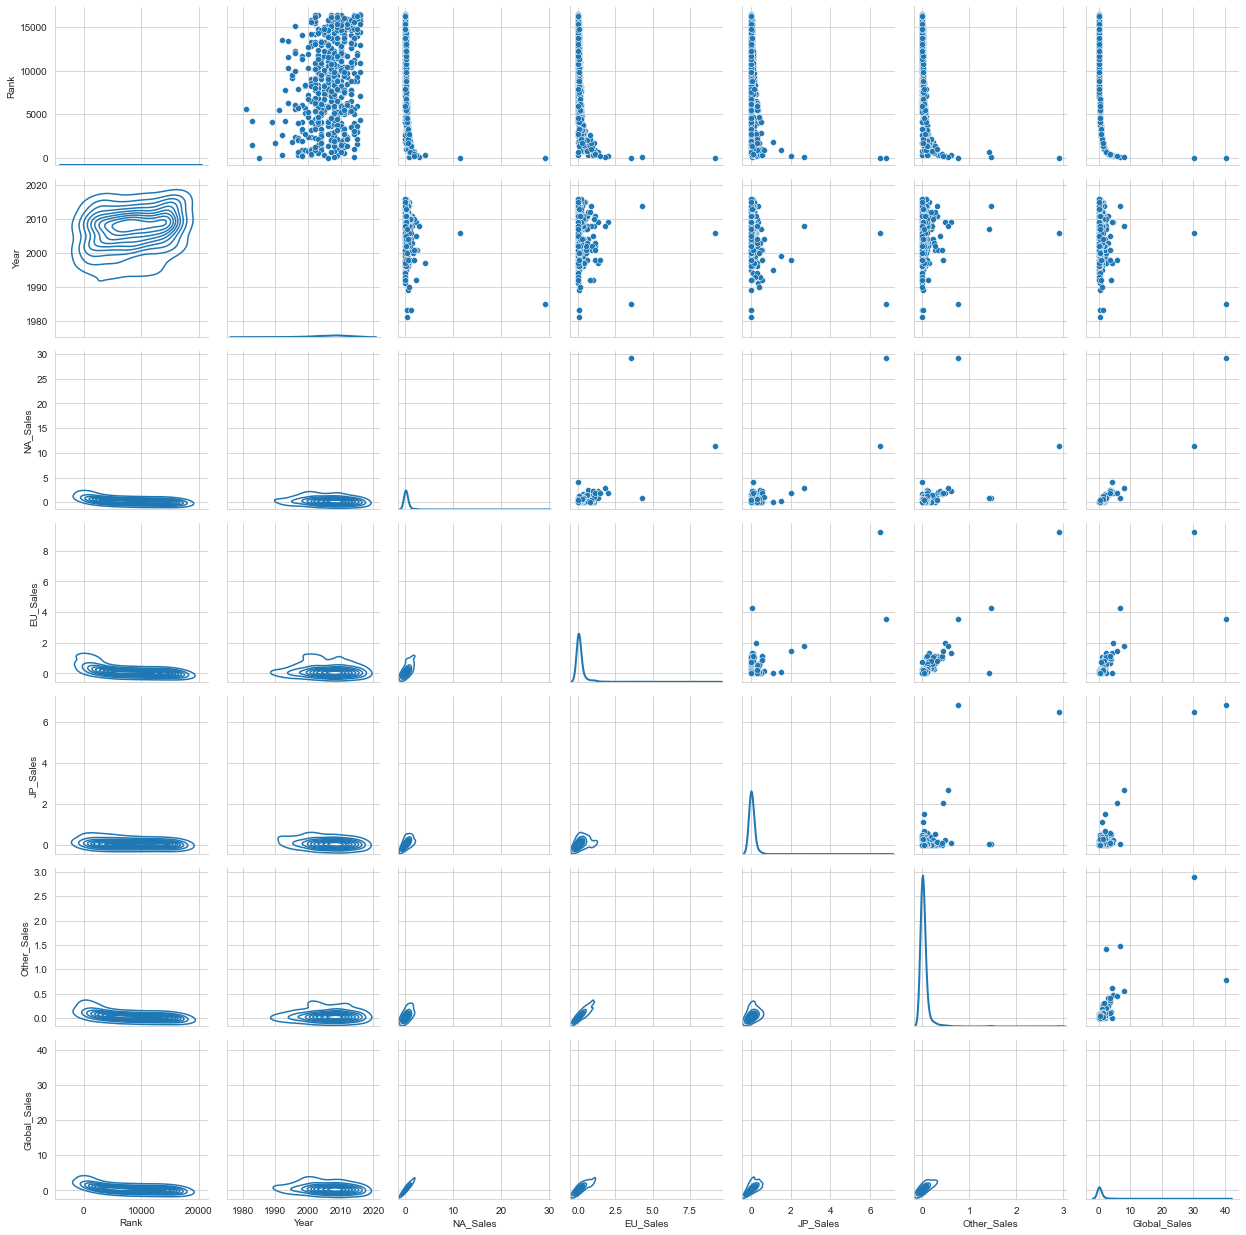

In [29]:
#- Показать соотношение между атрибутами (pairgrid);
pair_grid = sns.PairGrid(df)
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_lower(sns.kdeplot)
pair_grid.map_diag(sns.kdeplot, lw = 2)

In [30]:
#- Провести кластеризацию через Kmeans, предоставить результаты и их описать.
df_mini = df[["Rank", "Year", "Other_Sales"]][::100]
df_mini = df_mini.replace({'Rank' : np.nan}, '0')
df_mini = df_mini.replace({'Year' : np.nan}, '2222')
df_mini = df_mini.replace({'Other_Sales' : np.nan}, '0.01')
df_mini

,Rank,Year,Other_Sales
0,13982,2011.0,0.01
100,5295,2003.0,0.04
200,16201,2222,0.00
300,15350,2012.0,0.00
400,10157,2002.0,0.00
500,7920,2009.0,0.08


In [31]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(df_mini)
all_predictions = model.predict(df_mini)
df_mini["KMeans"] = all_predictions
df_mini

C:\Users\DELUR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Rank,Year,Other_Sales,KMeans
0,13982,2011.0,0.01,0
100,5295,2003.0,0.04,2
200,16201,2222,0.00,0
300,15350,2012.0,0.00,0
400,10157,2002.0,0.00,1
500,7920,2009.0,0.08,1


<Axes: xlabel='count', ylabel='KMeans'>

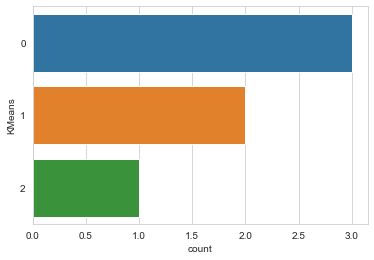

In [32]:
sns.countplot(data = df_mini, y = "KMeans")

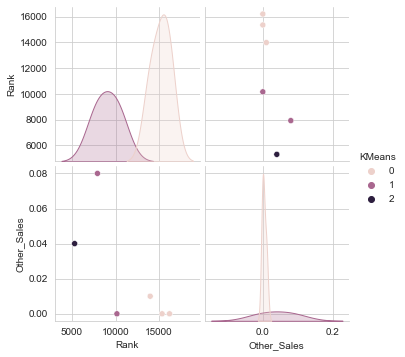

In [33]:
sns.pairplot(df_mini,hue="KMeans")